In [239]:
from scipy.optimize import linprog


**Starting with an example:**

In [240]:
A = np.array([[1, 0],
              [0, 2],
              [3, 2]])
b = np.array([4, 12, 18])
print(b)
c = np.array([3,5])

[ 4 12 18]


**initializations**

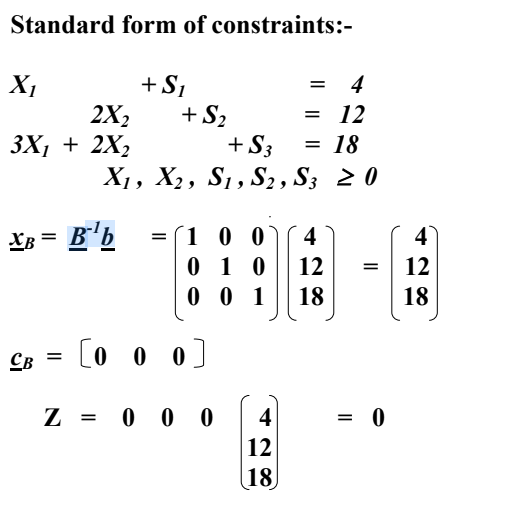

In [241]:
    m, n = A.shape # m is constraint count
    B = np.eye(m, dtype=int)
    c_B=np.zeros(m)
    print(c_B)
    x_B = np.linalg.solve(B, b)
    print(x_B)
    Z=np.dot(c_B, x_B)
    print(Z)
    C = np.hstack((c, c_B))
    print(C)

[0. 0. 0.]
[ 4. 12. 18.]
0.0
[3. 5. 0. 0. 0.]


# Step 1

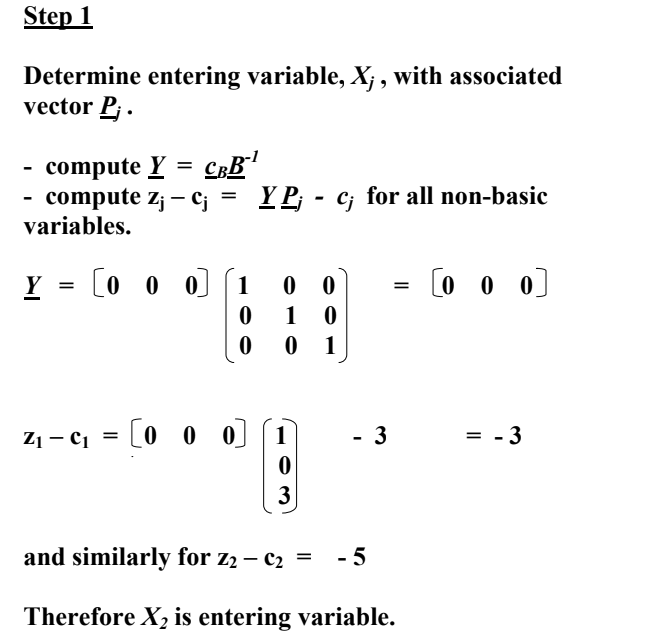

In [242]:
Y = np.linalg.solve(B.T, c_B)
print(Y)
diff_z_c = np.dot(Y, P[:, 0]) - C[0]
print(diff_z_c)
P = np.hstack((A, B))
print(P)
min_diff_z_c_index = None
min_diff_z_c_value = np.inf

for idx, value in enumerate(c_B):
    diff_z_c = np.dot(Y, P[:, idx]) - C[idx]

    if diff_z_c < min_diff_z_c_value:
        min_diff_z_c_value = diff_z_c
        min_diff_z_c_index = idx
    if not np.any(diff_z_c < 0):
        # Objective function value
        Z = np.dot(c_B, x_B)
        break
entering_index=min_diff_z_c_index

print(f"Smallest diff_z_c and entering variable: {min_diff_z_c_value} at entering_index: {entering_index+1}")
print(f"The entering variable is X{entering_index+1}")

[0. 0. 0.]
-3.0
[[1 0 1 0 0]
 [0 2 0 1 0]
 [3 2 0 0 1]]
Smallest diff_z_c and entering variable: -5.0 at entering_index: 2
The entering variable is X2


# step 2:

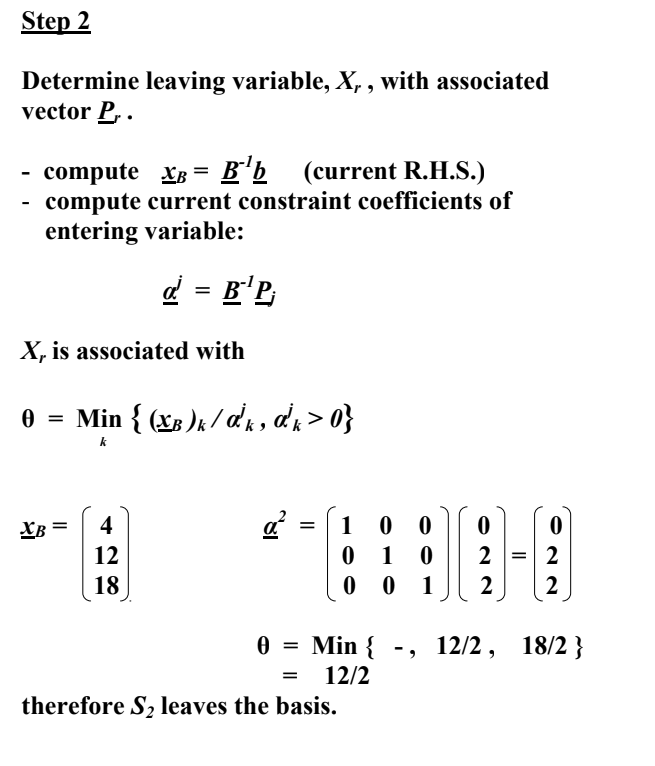

In [243]:
alpha = np.linalg.solve(B, P[:, entering_index])
print(P[:, entering_index])
print(alpha)
alpha[alpha <= 0] = np.nan
leaving_index = np.nanargmin(x_B / alpha)
print(f"The leaving is S{leaving_index+1}")

[0 2 2]
[0. 2. 2.]
The leaving is S2


# Step 3:

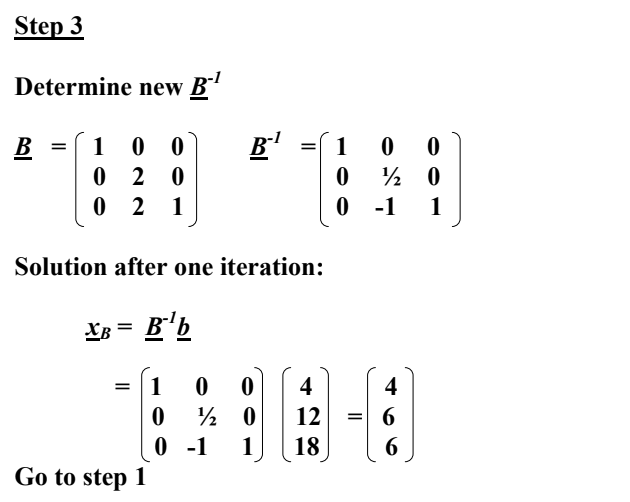

In [244]:
B[:, leaving_index] = P[:, entering_index]
#B_indices[leavingSlack_index] = entering_index
x_B = np.linalg.solve(B, b)
print(x_B)
c_B[leaving_index] = C[entering_index]
print(c_B)

[4. 6. 6.]
[0. 5. 0.]


# Now we know the process, Lets write it in a function to be easier to **use**

In [245]:
import numpy as np
def revised_simplex_method(A, b, c):
   #initializations
    m, n = A.shape
    B = np.eye(m, dtype=int)
    # keep track of the indices of the basic variables
    index = np.arange(n, n+m)
    #print(index)
    #print(index)
    c_B=np.zeros(m)
    C=np.hstack((c, c_B))
    x_B = np.linalg.solve(B, b)
    Z=np.dot(c_B, x_B)
    P = np.hstack((A, B))
    #boolean array to represent the set of basic and non-basic variables
    J= np.hstack((np.zeros(n), np.ones(m))).astype(bool)
    #print(J)
    while True:
      #step 1:
      print("Step 1")
      Y = np.linalg.solve(B.T, c_B)
      # diff_z_c = np.dot(Y, P[:, 0]) - C[0]
      #min_diff_z_c_index = None
      #min_diff_z_c_value = np.inf
      #for idx, value in enumerate(c_B):
      #diff_z_c = np.dot(Y, P[:, idx]) - C[idx]
      #if diff_z_c < min_diff_z_c_value:
      #  min_diff_z_c_value = diff_z_c
      #  min_diff_z_c_index = idx
      #if not np.any(diff_z_c < 0):
        # Objective function value
      #  Z = np.dot(c_B, x_B)
      # break
      #entering_index=min_diff_z_c_index
      #print(Y)
      #print(P)
      #print("This is c",C)
      #print("HEEEEEEEE")
      diff_z_c = (Y @ P[:, ~J]) - C[~J]
      if np.all(diff_z_c >= 0):
            # Objective function
            Z = np.dot(c_B, x_B)
            break

      entering_index=np.argmin(diff_z_c)
      for i, value in enumerate(J):
          if value == 0:
             entering_index -= 1  # decrease entering_index for each occurrence of 0
          if entering_index == -1:
            entering_index = i
            break


      print(f"Smallest Variable corresponding to entering variable: {np.min(diff_z_c)} at entering_index: {entering_index+1}")
      print(f"The entering variable is X{entering_index+1}")
      #step 2:
      print("Step 2")
      alpha = np.linalg.solve(B, P[:, entering_index])
      alpha[alpha <= 0] = np.nan
      leaving_index = np.nanargmin(x_B / alpha)


      for i in range(len(J)):
         if i == entering_index:
            J[i] = True


      print(f"The leaving is S{leaving_index+1}")
      #step 3:
      print("Step 3")
      B[:, leaving_index] = P[:, entering_index]
      #print(index)
      index[leaving_index] = entering_index
      #print(index)
      x_B = np.linalg.solve(B, b)
      c_B[leaving_index] = C[entering_index]


    #To make sure the values are ordered according to the variables
    Results = np.zeros(n+m)
    for i, value in zip(index, x_B):
        Results[i] = value
    #printing Results
    for i, value in enumerate(Results):
            print("--------------\n")
            print(f"X{i + 1} = {value:.4f} ")
    print("--------------\n")
    print(f"f  = {Z:.4f}\n")

# **Examples:**

Problem 1:

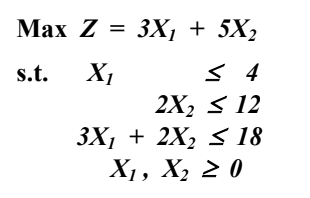

In [310]:
# Example usage:
A = np.array([[1, 0],
              [0, 2],
              [3, 2]])
b = np.array([4, 12, 18])
c = np.array([3,5])

revised_simplex_method(A, b, c)

Step 1
Smallest Variable corresponding to entering variable: -5.0 at entering_index: 2
The entering variable is X2
Step 2
The leaving is S2
Step 3
Step 1
Smallest Variable corresponding to entering variable: -3.0 at entering_index: 1
The entering variable is X1
Step 2
The leaving is S3
Step 3
Step 1
--------------

X1 = 2.0000 
--------------

X2 = 6.0000 
--------------

X3 = 2.0000 
--------------

X4 = 0.0000 
--------------

X5 = 0.0000 
--------------

f  = 36.0000



In [311]:
import time
bnd = [(0, float("inf")),  (0, float("inf"))]
start_time = time.time()
res_ = linprog(c= -np.ones(len(c)) * c, A_ub=A, b_ub=b, bounds=bnd, method="revised simplex")
print("Optimal solution:")
print(res_.x)
print("Optimal value:")
print(res_.fun)

Optimal solution:
[2. 6.]
Optimal value:
-36.0


<ipython-input-311-291486b28f20>:4: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_ = linprog(c= -np.ones(len(c)) * c, A_ub=A, b_ub=b, bounds=bnd, method="revised simplex")


Problem 2:

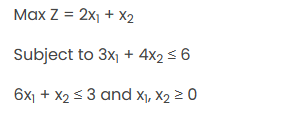

In [313]:
# Example usage:
A = np.array([[3, 4],
              [6, 1]])
b = np.array([6, 3])
c = np.array([2,1])

revised_simplex_method(A, b, c)

Step 1
Smallest Variable corresponding to entering variable: -2.0 at entering_index: 1
The entering variable is X1
Step 2
The leaving is S2
Step 3
Step 1
Smallest Variable corresponding to entering variable: -0.6666666666666667 at entering_index: 2
The entering variable is X2
Step 2
The leaving is S1
Step 3
Step 1
--------------

X1 = 0.2857 
--------------

X2 = 1.2857 
--------------

X3 = 0.0000 
--------------

X4 = 0.0000 
--------------

f  = 1.8571



In [314]:
import time
bnd = [(0, float("inf")),  (0, float("inf"))]
start_time = time.time()
res_ = linprog(c= -np.ones(len(c)) * c, A_ub=A, b_ub=b, bounds=bnd, method="revised simplex")
print("Optimal solution:")
print(res_.x)
print("Optimal value:")
print(res_.fun)

Optimal solution:
[0.28571429 1.28571429]
Optimal value:
-1.8571428571428572


<ipython-input-314-291486b28f20>:4: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_ = linprog(c= -np.ones(len(c)) * c, A_ub=A, b_ub=b, bounds=bnd, method="revised simplex")


Problem 3:

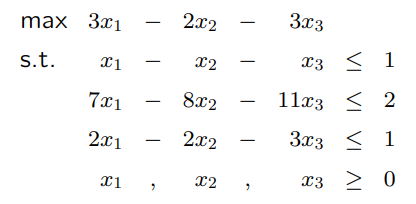

In [316]:
# Example usage:
A = np.array([[1 ,-1, -1],
              [7 ,-8 ,-11],
              [2 ,-2, -3]])
b = np.array([1,2,1])
c = np.array([3,-2,-3])

revised_simplex_method(A, b, c)

Step 1
Smallest Variable corresponding to entering variable: -3.0 at entering_index: 1
The entering variable is X1
Step 2
The leaving is S2
Step 3
Step 1
Smallest Variable corresponding to entering variable: -1.7142857142857144 at entering_index: 3
The entering variable is X3
Step 2
The leaving is S1
Step 3
Step 1
Smallest Variable corresponding to entering variable: -1.0 at entering_index: 2
The entering variable is X2
Step 2
The leaving is S3
Step 3
Step 1
--------------

X1 = 3.0000 
--------------

X2 = 1.0000 
--------------

X3 = 1.0000 
--------------

X4 = 0.0000 
--------------

X5 = 0.0000 
--------------

X6 = 0.0000 
--------------

f  = 4.0000



In [318]:
import time
bnd = [(0, float("inf")),  (0, float("inf")),(0, float("inf"))]
start_time = time.time()
res_ = linprog(c= -np.ones(len(c)) * c, A_ub=A, b_ub=b, bounds=bnd, method="revised simplex")
print("Optimal solution:")
print(res_.x)
print("Optimal value:")
print(res_.fun)

Optimal solution:
[3. 1. 1.]
Optimal value:
-4.000000000000001


<ipython-input-318-7eb04f27489e>:4: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res_ = linprog(c= -np.ones(len(c)) * c, A_ub=A, b_ub=b, bounds=bnd, method="revised simplex")


In [323]:
!jupyter nbconvert --to latex Math404_Report1.ipynb


[NbConvertApp] Converting notebook Math404_Report1.ipynb to latex
[NbConvertApp] Writing 48429 bytes to Math404_Report1.tex
